## 12. 特徴量選択
### 12.1 特徴量選択について
データ分析を行うために集計した要素および値を特徴量と呼ぶ。  
集計した特徴量から、研究の目的に役立つ変数を選択することを**特徴量選択**と呼ぶ。  
著者識別や文体分析を目的とするならば、一般的には内容語を用いるべきではない。  
なぜなら、同一の著者でも、作品の主題に応じて、用いる名詞はおのずと異なってくるからである。  
内容語の主な品詞は名詞である。名詞は代名詞、固有名詞、形式名詞などさらに細分類できる。  
著者識別に有効なものもあり、話題と関係が強いものは一般名詞、固有名詞、組織名詞、地域名詞、数名詞などである。

### 12.2 理論的特徴量選択
理論的特徴量選択とは、言語理論や情報理論などに基づいて、研究の目的に必要となる要素のみを選択しても用いることである。  
理論的に集計のターゲットを絞っても、ケースによっては集計された特徴量の次元が高いことがある。  
さらに次元を縮約する方法としては、集計したデータの度数でコントロールすることが挙げられる。

### 12.3 機械的特徴量選択
さらに役立つ変数選択の方法として、機械的計算による特徴量選択がある。  
これは、評価指数やモデルを用いて計算し、何らかの評価方法で有効となる変数をランキングする方法であり、  
フィルター法、ラッパー法、埋め込み法に大別される。  
### フィルター法
**フィルター法**とは、評価指数を用いて一つひとつの変数について評価指数値を計算し、その結果をランキングする方法である。  
主に用いるのは、統計的仮説検定の統計量、情報量、AUC値などである。
##### 統計的検定統計量
2つのテキスト間で差異が顕著にある語を見つけ出すには、各語の比率の差の検定統計量を求め、ランキングすればよい。  
グループが2つであれば、グループごとにまとめて比率検定統計量を求めることも考えられる。  
テキストが3つ以上の場合は、各テキストに出現する頻度の高い語についてそれぞれ分割表を作成し、  
カイ2乗検定統計量、または尤度比検定統計量を用いることができる。  
3つ以上のグループの場合は、グループ単位でデータをまとめてカイ2乗検定統計量を用いる方法、  
またはグループ単位の一元配置分散分析の統計量を用いる方法が適応可能である。

In [1]:
import pandas as pd

d1 = pd.read_csv('study/参考書/テキストアナリティクス/NatsuIzumi1.csv', encoding='shift-jis', index_col=0)
d1 = d1.iloc[:,:-1]
d1

,authors,comma,period,no,te,ni,wo,ha,ga,to,A_bracket,mo,de,si,nagara,ka,he,iru,suru
夏目漱石_三四郎,A,0.063017,0.081702,0.055820,0.054879,0.047294,0.044443,0.047709,0.039640,0.033522,0.020180,0.013107,0.013952,0.012789,0.013232,0.009965,0.010076,0.013813,0.004332
夏目漱石_吾輩は猫である,A,0.049047,0.054211,0.054906,0.049735,0.045173,0.043964,0.046498,0.038648,0.039749,0.023448,0.017916,0.015041,0.016619,0.014700,0.011072,0.007466,0.009045,0.007184
夏目漱石_坊っちゃん,A,0.071780,0.062189,0.044047,0.054653,0.039759,0.041891,0.043413,0.042804,0.039277,0.008627,0.016213,0.016543,0.016239,0.017507,0.010200,0.011849,0.006369,0.005075
夏目漱石_坑夫,A,0.080640,0.065340,0.047496,0.053928,0.047828,0.036922,0.038518,0.041537,0.036906,0.008440,0.018571,0.014525,0.014762,0.015458,0.009057,0.010084,0.008314,0.004520
夏目漱石_夢十夜,A,0.061637,0.086238,0.059997,0.067924,0.051934,0.049200,0.040454,0.037994,0.040044,0.008883,0.011480,0.016674,0.010250,0.010797,0.007380,0.012710,0.012027,0.002733
夏目漱石_文鳥,A,0.053900,0.086662,0.056436,0.069964,0.053477,0.064468,0.049250,0.032340,0.036145,0.000211,0.013316,0.013316,0.012682,0.012260,0.004862,0.016910,0.012894,0.002748
夏目漱石_琴のそら音,A,0.038425,0.053179,0.053285,0.047129,0.047659,0.041928,0.039699,0.040548,0.045430,0.026855,0.016346,0.014754,0.014648,0.016028,0.014011,0.006050,0.008279,0.006050
夏目漱石_草枕,A,0.086360,0.066346,0.064219,0.045045,0.054422,0.044283,0.044073,0.037901,0.032201,0.019463,0.018018,0.012712,0.010926,0.011110,0.010532,0.007512,0.008247,0.005332
夏目漱石_虞美人草,A,0.056060,0.072863,0.057034,0.042597,0.053592,0.048689,0.051972,0.031795,0.033539,0.035815,0.014493,0.010983,0.010553,0.011040,0.010938,0.006262,0.007756,0.005243
夏目漱石_野分,A,0.052207,0.070320,0.055295,0.046349,0.047256,0.048555,0.051006,0.034560,0.030417,0.030957,0.014804,0.011103,0.015074,0.012353,0.011667,0.005882,0.009387,0.007476


夏目漱石と泉鏡花のそれぞれ10作品における助詞「の」の使用率を示す。  
夏目漱石と泉鏡花を切り分ける境界線を考える。

In [6]:
d1.sort_values('no', ascending=True)['no']

夏目漱石_坊っちゃん      0.044047
泉鏡花_化鳥          0.045069
夏目漱石_坑夫         0.047496
夏目漱石_琴のそら音      0.053285
夏目漱石_吾輩は猫である    0.054906
泉鏡花_縁結び         0.055271
夏目漱石_野分         0.055295
夏目漱石_三四郎        0.055820
夏目漱石_文鳥         0.056436
夏目漱石_虞美人草       0.057034
泉鏡花_高野聖         0.057441
夏目漱石_夢十夜        0.059997
泉鏡花_歌行燈         0.061191
夏目漱石_草枕         0.064219
泉鏡花_鷭狩          0.065145
泉鏡花_小春の狐        0.065655
泉鏡花_売色鴨南蛮       0.072741
泉鏡花_国貞えがく       0.073805
泉鏡花_怨霊借用        0.075063
泉鏡花_遺稿          0.086097
Name: no, dtype: float64

#### Gini不純度
**Gini不純度**は、次のように定義される。$\Delta GI$が大きい変数を分割点として採用する。
$$
\Delta GI=P_tGI(t)-P_LGI(t_L)-P_RGI(t_R),\ GI(t)=1\sum_{k}p(k|t)^2
$$
#### 情報量ベースの指標
確率変数$X=\{x_1,x_2,\cdots,x_i,\cdots,x_n\}$のおける$x_i$の確率を$p(x_i)$で示すと、
$$
H(X)=\sum_{i=1}^np(x_i)\log p(x_i)
$$
で定義される量をシャノンの情報量、あるいは**エントロピー**と呼ぶ。単位はビット(bit)である。
#### 結合エントロピー
2つの確率変数を$X,Y$で表し、$x_i,y_k$が同時に現れる確率が$p(x_i,y_k)$であるとき、
$$
H(X,Y)=-\sum_i\sum_kp(x_i,y_k)\log p(x_i,y_k)
$$
を**結合エントロピー**と呼ぶ。  
#### 条件付きエントロピー
条件付き確率に対応するエントロピーを**条件付きエントロピー(CE)**と呼び、次の式で定義される。
$$
\begin{align}
H(Y|X)&=-\sum_i\sum_kp(x_i)p(x_i|y_k)\log p(x_i|y_k)\\
&=-\sum_i\sum_kp(x_i,y_k)\log p(x_i,y_k)
\end{align}
$$
#### 相互情報量
2つの確率変数$X,Y$の間の**相互情報量**は、次の式で定義されている。
$$
MI(X;Y)=\sum_i\sum_kp(x_i,y_k)\log\frac{p(x_i,y_k)}{p(x_i)p(y_k)}
$$
また、相互情報量とエントロピーとの関係を次に示す。
$$
\begin{align}
MI(X;Y)&=H(X)-H(X|Y)\\
&=H(Y)-H(Y|X)\\
&=H(X)+H(Y)-H(X,Y)
\end{align}
$$
2つの確率点の相互情報量は次の式で定義される。
$$
PMI(x_i,y_k)=\log\frac{p(x_i,y_k)}{p(x_i)p(y_k)}
$$
相互情報量は**情報利得(IG)**とも呼ぶ。
#### 情報利得比
**情報利得比(GR)**は、分割前の情報利得を分割後のエントロピーで割った値である。  
情報利得比では、値が大きい分割基準を推奨する。
$$
GR=\frac{MI(X;Y)}{H(Y)}
$$
#### AUC/ROC
AUCはROC曲線の下側の面積である。AUC値が大きいほど分類の正解率が高いため、値が大きい分割基準を採用する。
#### 距離法
距離法ではグループ間の距離を求め、距離が大きい変数が重要だと判断する。
2つのベクトルのマハラノビス距離はいあkのように定義されている。
$$
d(\boldsymbol{x},\boldsymbol{y})^2=\sum_{i=1}^n\frac{(x_i-y_i)^2}{\sigma_i^2}
$$

In [423]:
import re
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_auc_score
import warnings
warnings.simplefilter('ignore')

d1['著者'] = ['夏目漱石' if bool(re.search('夏目', s)) else '泉鏡花' for s in d1.index]

def add_judge(t):
    d = d1.copy()
    d.loc[d['no']<t, 'judge'] = '夏目漱石'
    d.loc[d['no']>=t, 'judge'] = '泉鏡花'
    return d

def calc_GI(nA, nB, nA0, nA1, nB0, nB1):
    PGIt = 1-((10/20)**2+(10/20)**2)
    PGItL = nA/20*(1-((nA0/nA)**2+(nA1/nA)**2))
    PGItR = nB/20*(1-((nB0/nB)**2+(nB1/nB)**2))
    GI = PGIt - PGItL - PGItR
    return GI

def calc_CE(nA, nB, nA0, nA1, nB0, nB1):
    logs = [0 if np.isnan(x)|np.isinf(np.abs(x)) else x for x in [np.log(nA0/nA), np.log(nA1/nA), np.log(nB0/nA), np.log(nB1/nA)]]
    CE=-nA/20*(nA0/nA*logs[0]+nA1/nA*logs[1])-nB/20*(nB0/nB*logs[2]+nB1/nB*logs[2])
    return CE

def calc_MI(nA, nB, nA0, nA1, nB0, nB1):
    logs2 = [np.log((nA0/20)/((10/20)*(nA/20))),np.log((nA1/20)/((10/20)*(nA/20))),
             np.log((nB0/20)/((10/20)*(nB/20))),np.log((nB1/20)/((10/20)*(nB/20)))]
    logs2 = [0 if np.isnan(x)|np.isinf(np.abs(x)) else x for x in logs2]

    MI = (nA0/20)*logs2[0]+(nA1/20)*logs2[1]+(nB0/20)*logs2[2]+(nB1/20)*logs2[3]
    return MI

def calc_GR(MI, nA, nB):
    H = -nA/20 * np.log(nA/20) - nB/20 * np.log(nB/20)
    GR = MI/H
    return GR

def calc_AUC(tbl):
    AUC = roc_auc_score(np.array(tbl['flg1']), np.array(tbl['flg2']))
    return AUC

In [424]:
def calc_metrics(t):
    tbl = add_judge(t)[['著者', 'judge', 'no']]
    tbl.loc[tbl['judge']=='夏目漱石', 'flg1'] = 0
    tbl.loc[tbl['judge']!='夏目漱石', 'flg1'] = 1
    tbl.loc[tbl['著者']=='夏目漱石', 'flg2'] = 0
    tbl.loc[tbl['著者']!='夏目漱石', 'flg2'] = 1

    print('threshold: ', t)
    
    cross = pd.crosstab(tbl.著者, tbl.judge)
    print(cross)
    print('')
    
    (chi, p) = chi2_contingency(cross)[:2]
    print('Chisq: ', chi, '  p-value: ', p)

    nA = np.sum(cross.夏目漱石)
    nB = np.sum(cross.泉鏡花)

    nA0 = cross.夏目漱石[0]
    nA1 = cross.夏目漱石[1]
    nB0 = cross.泉鏡花[0]
    nB1 = cross.泉鏡花[1]

    gi = calc_GI(nA, nB, nA0, nA1, nB0, nB1)
    ce = calc_CE(nA, nB, nA0, nA1, nB0, nB1)
    mi = calc_MI(nA, nB, nA0, nA1, nB0, nB1)
    gr = calc_GR(MI, nA, nB)
    auc = calc_AUC(tbl)

    print('GI: ', gi)
    print('CE: ', ce)
    print('MI: ', mi)
    print('GR: ', gr)
    print('AUC: ', auc)

In [425]:
calc_metrics(t=0.0647)

threshold:  0.0647
judge  夏目漱石  泉鏡花
著者              
夏目漱石     10    0
泉鏡花       4    6

Chisq:  5.9523809523809526   p-value:  0.014697421770023516
GI:  0.2142857142857143
CE:  0.41878871200968004
MI:  0.27435846855026524
GR:  0.4491316117627886
AUC:  0.8571428571428572


In [426]:
calc_metrics(t=0.0606)

threshold:  0.0606
judge  夏目漱石  泉鏡花
著者              
夏目漱石      9    1
泉鏡花       3    7

Chisq:  5.208333333333334   p-value:  0.022478873366125265
GI:  0.1875
CE:  1.3313637466864852
MI:  0.20503802928608553
GR:  0.40765781932052564
AUC:  0.8125


In [428]:
calc_metrics(t=0.0572)

threshold:  0.0572
judge  夏目漱石  泉鏡花
著者              
夏目漱石      8    2
泉鏡花       2    8

Chisq:  5.0   p-value:  0.025347318677468325
GI:  0.18000000000000016
CE:  1.0549201679861442
MI:  0.19274475702175753
GR:  0.3958156020033583
AUC:  0.8


### ラッパー法
**ラッパー法**は、複数の特徴量を同時に使って予測モデルを作成し、モデルの精度がもっとも高くなるような特徴量を探索して、  
それぞれの特徴量がモデルに寄与する度合を計算してランキングする方法である。  
ランダムフォレストでは、正解率の減少の平均(MDA)に基づいた方法と、Gini不純度の減少の平均(MDG)を用いた2種類の方法が実装されている。  
そのアルゴリズムの概要を示す。
1. 学習データを用いてモデルを作成する
2. OOBデータでテストを行う
3. OOBデータをコピーし、1変数ずつ行をランダムに並べ替え、目的変数をの関連性をなくして、テストの結果を記録する
4. 元のOOBを用いたテスト結果と、変数ごとにランダムに入れ替えたOOBデータのテスト結果との差分を算出し、  
差分が大きいほどその変数が重要であると判断する。MDAを用いる際には正解率、MDGを用いる際にはGini不純度の差分を用いる。  
  
このアイディアを発展させたものに**Boruta**というアルゴリズムが提案された。 
**ボルタ法**では、ランダムな変数も目的変数とある程度関連性を持つ可能性があるため、  
モデルに重要となる変数はランダムに並べ替えた変数より明らかに有効であるはずという考え方に基づいている。
1. 入力データをコピーし、変数ごとにランダムに並べ替え、応答変数とは無相関なランダムのデータを作成し、  
元のデータセットの横に結合してデータセットを拡張する  
2. 拡張したデータセットをランダムフォレストに適応し、zスコアを算出する。  
zスコアは誤差の平均値を標準偏差で割った値である。  
3. ランダムに入れ替えた変数の中で最大のzスコア、MZSAを基準とし、元の変数がMZSAより高い回数(ヒット数)を記録する  
4. MZSAとすべての変数のヒット数について両側の比率検定を行い、差が大きいほど重要だと判断する

In [431]:
d2 = pd.read_csv('study/参考書/テキストアナリティクス/NatsuIzumi2.csv', encoding='shift-jis', index_col=0)
d2 = d2.iloc[:,:-1]
d2

,authors,読点,句点,の,て,に,を,は,が,と,...,持た,振り,料簡,本来,添え,濃く,踏ん,近頃,避け,間違っ
夏目漱石_三四郎,A,0.063017,0.081702,0.055820,0.054879,0.047294,0.044443,0.047709,0.039640,0.033522,...,0.000041,0.000014,0.000000,0.000069,0.000041,0.000055,0.000014,0.000000,0.000028,0.000041
夏目漱石_吾輩は猫である,A,0.049047,0.054211,0.054906,0.049735,0.045173,0.043964,0.046498,0.038648,0.039749,...,0.000036,0.000101,0.000000,0.000051,0.000051,0.000007,0.000022,0.000080,0.000022,0.000043
夏目漱石_坊っちゃん,A,0.071780,0.062189,0.044047,0.054653,0.039759,0.041891,0.043413,0.042804,0.039277,...,0.000025,0.000076,0.000000,0.000025,0.000000,0.000000,0.000051,0.000076,0.000025,0.000051
夏目漱石_坑夫,A,0.080640,0.065340,0.047496,0.053928,0.047828,0.036922,0.038518,0.041537,0.036906,...,0.000016,0.000016,0.000205,0.000000,0.000000,0.000079,0.000158,0.000000,0.000095,0.000000
夏目漱石_夢十夜,A,0.061637,0.086238,0.059997,0.067924,0.051934,0.049200,0.040454,0.037994,0.040044,...,0.000000,0.000000,0.000000,0.000000,0.000137,0.000137,0.000000,0.000000,0.000000,0.000000
夏目漱石_文鳥,A,0.053900,0.086662,0.056436,0.069964,0.053477,0.064468,0.049250,0.032340,0.036145,...,0.000000,0.000211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
夏目漱石_琴のそら音,A,0.038425,0.053179,0.053285,0.047129,0.047659,0.041928,0.039699,0.040548,0.045430,...,0.000000,0.000106,0.000000,0.000106,0.000000,0.000000,0.000000,0.000212,0.000000,0.000000
夏目漱石_草枕,A,0.086360,0.066346,0.064219,0.045045,0.054422,0.044283,0.044073,0.037901,0.032201,...,0.000079,0.000000,0.000000,0.000079,0.000053,0.000053,0.000026,0.000053,0.000053,0.000053
夏目漱石_虞美人草,A,0.056060,0.072863,0.057034,0.042597,0.053592,0.048689,0.051972,0.031795,0.033539,...,0.000057,0.000079,0.000147,0.000125,0.000091,0.000057,0.000057,0.000057,0.000068,0.000068
夏目漱石_野分,A,0.052207,0.070320,0.055295,0.046349,0.047256,0.048555,0.051006,0.034560,0.030417,...,0.000098,0.000024,0.000000,0.000000,0.000000,0.000123,0.000000,0.000073,0.000172,0.000172


In [437]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from multiprocessing import cpu_count

rf = RandomForestClassifier(n_jobs=int(cpu_count()/2), max_depth=7)
feat_selector = BorutaPy(rf, n_estimators='auto', two_step=False,verbose=0, random_state=42)
feat_selector.fit(d2.iloc[:,1:].values, d2.iloc[:,0].values)

BorutaPy(estimator=RandomForestClassifier(max_depth=7, n_estimators=190,
                                          n_jobs=4,
                                          random_state=RandomState(MT19937) at 0x1D4508BFA40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1D4508BFA40, two_step=False)

In [439]:
print(d2.iloc[:,1:].columns[feat_selector.support_])

Index(['読点', 'は', 'いる', 'ある', 'なる', 'お', 'なら', 'しかし', 'どこ', '考え', '出る', '始め',
       'みんな', '答え', '々', 'なるほど', 'なに', 'のみ', 'すれ', 'いくら', 'やはり', 'しきりに', '静か',
       '非常', 'やめ', 'はなはだ', 'けれど', 'たしかに', '得意', '容易', '決心', '丸い', '飛び込ん', '取'],
      dtype='object')


In [448]:
rf = RandomForestClassifier(n_jobs=int(cpu_count()/2), max_depth=7)
rf.fit(d2.loc[:,d2.iloc[:,1:].columns[feat_selector.support_]].values, d2.iloc[:,0].values)

RandomForestClassifier(max_depth=7, n_jobs=4)

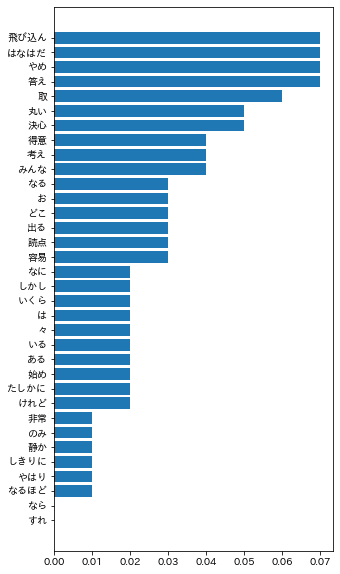

In [452]:
import matplotlib.pyplot as plt
import japanize_matplotlib

importance =pd.DataFrame({'feature':d2.iloc[:,1:].columns[feat_selector.support_],
                          'importance':rf.feature_importances_})\
                .sort_values('importance', ascending=True).reset_index(drop=True)

plt.figure(figsize=(5,10))

plt.barh(y=importance['feature'],
         width=importance['importance']);

### 埋め込み法
フィルター法は一つひとうの変数について評価するものであり、モデルの精度を考慮していない。  
ラッパー法は、選択して用いる変数の組み合わせを変えて繰り返し検証を行わなければならないため、計算時間が長くかかる。  
**埋め込み法**は、フィルター法とラッパー法の両方法の短所を克服することを目的として開発された方法である。